# Lineare Regression - Einführung

## <span style="color:red">Schritt 1: Import des Atticus Finch Datensatzes von GitHub</span>

In [1]:
import pandas as pd

# URL des Atticus Finch Datensatzes
url = 'https://raw.githubusercontent.com/OJanz/AtticusFinch/main/AtticusFinchSalesData_v1.csv'  

# Daten in Pandas Data Frame einlesen
df = pd.read_csv(url)

# Die ersten fünf Datensätze ausgeben
print(df.head())

   Store-ID  Frequency  TiM   PPP  Central  Space  Sales
0        59       4740  198   268     1.18    364    710
1        60       7703  367  1314     1.10    802   2367
2        61       9928  303  1046     1.62    926   2325
3        62      10139  644  1290     1.46   1269   3284
4        63      11170  902  1142     1.00   1149   2429


## <span style="color:red">Schritt 2: Übersicht mit Hilfe eines Scatterplot verschaffen</span>

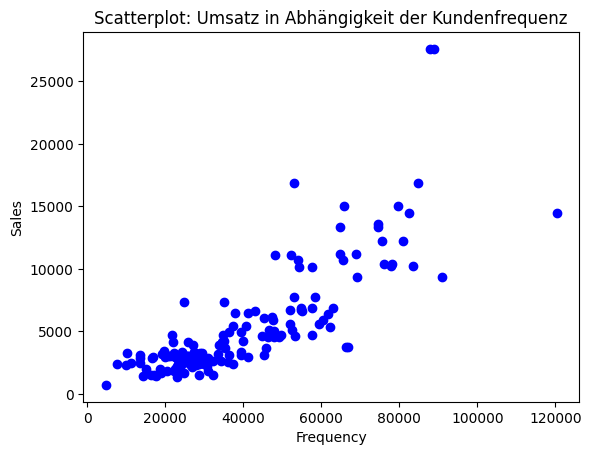

In [2]:
import matplotlib.pyplot as plt
# %matplotlib inline = Magic Command --> weist jupyter an, Ergebnisse von matplotlib im Notebook anzuzeigen
%matplotlib inline 

# Scatterplot von 'Frequency' und y anlegen
plt.scatter(df['Frequency'], df['Sales'], color = 'blue')
# Achsenbeschriftungen anlegen
plt.xlabel('Frequency')
plt.ylabel('Sales')
# Titel des Diagramms anlegen
plt.title('Scatterplot: Umsatz in Abhängigkeit der Kundenfrequenz')
# Scatterplot anzeigen
plt.show()

## <span style="color:red">Schritt 3: Prädiktor und abhänige Variable vorbereiten</span>

In [3]:
import statsmodels.api as sm

# Frequency als Prädiktor und Sales als abhängige Variable aus Data Frame auswählen
X = df['Frequency']
y = df['Sales']

# Konstante hinzufügen um Achsenabschnitt schätzen zu können (bei statsmodels notwendig)
X = sm.add_constant(X)

# Ausschnitt aus Prädiktor und abhängiger Variable zeigen
print("X")
print(X.head())

print("\ny")     # \n erzeugt einen Zeilenumbruch vor y
print(y.head())

X
   const  Frequency
0    1.0       4740
1    1.0       7703
2    1.0       9928
3    1.0      10139
4    1.0      11170

y
0     710
1    2367
2    2325
3    3284
4    2429
Name: Sales, dtype: int64


## <span style="color:red">Schritt 4: Regressionsmodell erstellen und Parameter schätzen</span>

In [4]:
# Erstellen des linearen Regressionsmodells
model = sm.OLS(y, X)    # sm = statsmodels Objekt, siehe oben, OLS = Ordinary Least Square Methode, Methode wird model zugewiesen
results = model.fit()   # .fit führt die Regression durch und übergibt die Werte an results

# Steigung und Achsenabschnitt ausgeben
print("Regressionskoeffizienten:")
print(results.params)

Regressionskoeffizienten:
const       -1472.016706
Frequency       0.170369
dtype: float64


### Ergebnis der Regression

'const' = Achsenabschnitt und 'Frequency' = Regressionskoeffizient für Frequency

Daraus ergbis sich folgende Regressionsgerade:

y = -1472.016706 + 0.170369 x



## <span style="color:red">Schritt 5: Umsatzschätzung für bestehende Frequenzwerte</span>

Schätzwerte für den Umsaz auf Basis der besteneden Frequenzwerte
0   -664.469283
1   -159.666960
2    219.403297
3    255.351083
4    431.001166
dtype: float64




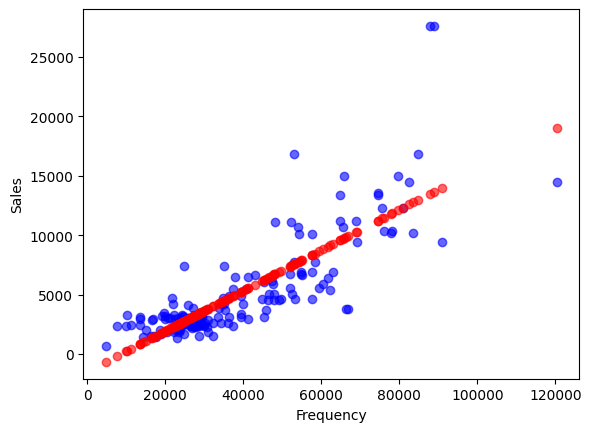

In [5]:
# Schätzwerte für bestehende Frequenzdaten ermitteln
y_pred = results.predict(X)

print('Schätzwerte für den Umsaz auf Basis der besteneden Frequenzwerte')
print(y_pred.head())
print('\n')

# Scatterplot für bereinigte Daten
plt.scatter(X['Frequency'], y, color='blue', alpha=0.6)

# Scatterplot für Ausreißer
plt.scatter(X['Frequency'], y_pred, color='red', alpha=0.6)

plt.xlabel('Frequency')
plt.ylabel('Sales')

# Zeige den Plot an
plt.show()

## <span style="color:red">Schritt 6: Güte berechnen</span>

In [7]:
from sklearn import metrics
import numpy as np



# Berechnen der Gütemaße

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, y_pred).round(4))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_pred)).round(4))
print('R-squared (R2):', metrics.r2_score(y, y_pred).round(4))

Mean Absolute Error (MAE): 1653.6977
Root Mean Squared Error (RMSE): 2562.1123
R-squared (R2): 0.6547


#### 65% der Varianz des Umsatzes wird durch die Kundenfrequenz erklärt

## <span style="color:red">Schritt 7: Umsatzschätzung für einen neuen Frequenzwert</span>

In [8]:
# Umsatzschätzung für einen neuen Standort mit einer Kundenfrequenz von 25000
freq_new = 25000
df_freq_new = pd.DataFrame({'const': [1], 'Frequency': [freq_new]})  # Dataframe mit Konstante und neuem Frequenzwert erzeugen

sales_new = results.predict(df_freq_new) # Umsatz berechnen
sales_new_value = sales_new[0].item() # Da das Ergebnis in einer Liste gespeichert wird, übertragung des ersten Wertses (0) der Liste

print('Bei einer Frequenz von {} Passanten ist mit einem Umsatz von {} Pfund zu rechnen.'.format(freq_new, round(sales_new_value, 2)))


Bei einer Frequenz von 25000 Passanten ist mit einem Umsatz von 2787.2 Pfund zu rechnen.


## <span style="color:red">Zusatz: Ausgabe der detaillierten Modellstatistiken</span>

In [9]:
# Ausgeben der Modellstatistiken
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     297.7
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           4.36e-38
Time:                        11:28:43   Log-Likelihood:                -1473.5
No. Observations:                 159   AIC:                             2951.
Df Residuals:                     157   BIC:                             2957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1472.0167    438.865     -3.354      0.0